In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Bagging

### Ensemble methods
- voting classifier
 - same training set, different algorithms
 
- Bagging
 - one algorithm, different subsets of the training set
 
### Bagging
- Bagging: Bootstrap Aggregation
- Uses a technique know as the bootstrap
 - Bootstrap: sample with replacement
- Reduces variance of individual models in the ensemble

### Bagging: Classification & Regression
- Classification:
 - Aggregates predictions by majority voting
 - BaggingClassifer in scikit-learn
- Regression
 - Aggregates predictions through averaging
 - BaggingRegressor in scikit-learn

### Bagging Classifier in sklearn (Breast-Cancer dataset)

In [2]:
wbc = pd.read_csv('wbc.csv').drop('Unnamed: 32', axis=1)
y = wbc['diagnosis']
X = wbc.drop(['id', 'diagnosis'], axis=1)

In [3]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

In [4]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.930


### Exercise: Define the bagging classifier
In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [5]:
liver = pd.read_csv('indian_liver_patient.csv')
liver.dropna(axis=0, inplace=True)
liver['Is_male'] = liver['Gender'].astype('category').cat.codes
X = liver.drop(['Dataset', 'Gender'] , axis=1)
y = liver['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [6]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

Great! In the following exercise, you'll train bc and evaluate its test set performance.

### Exercise: Evaluate Bagging performance
Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [7]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.70


Great work! A single tree dt would have achieved an accuracy of 63% which is ~~8~~7% lower than bc's accuracy!

## Out Of Bag (OOB) Evaluation

### Bagging
- some instances may be sampled several times for one model
- other instances may not be sampled at all

### Out Of Bag (OOB) instances
- on average, for each model, 63% of the training instances are sampled.
 - [why?](https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710)
- the remaining 37% constitute the OOB instances

### OOB Evaluation in sklearn (Breast Canser Dataset)

In [8]:
wbc = pd.read_csv('wbc.csv').drop('Unnamed: 32', axis=1)
y = wbc['diagnosis']
X = wbc.drop(['id', 'diagnosis'], axis=1)

In [9]:
# Import models and split utility function
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'; set oob_score = True
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Test set accuracy: 0.936
OOB accuracy: 0.930


The two obtained accuracies are pretty close though not exactly equal. These results highlight how OOB evaluation can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation.

### Exercise: Prepare the ground
In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

In [10]:
liver = pd.read_csv('indian_liver_patient.csv')
liver.dropna(axis=0, inplace=True)
liver['Is_male'] = liver['Gender'].astype('category').cat.codes
X = liver.drop(['Dataset', 'Gender'] , axis=1)
y = liver['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [11]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
                       n_estimators=50,
                       oob_score=True,
                       random_state=1)

Great! In the following exercise, you'll train bc and compare its test set accuracy to its OOB accuracy.

### Exercise: OOB Score vs Test Set Score
Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [12]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.707, OOB accuracy: 0.677


Great work! The test set accuracy and the OOB accuracy of bc are both roughly equal ~~to 70%~~!

## Random Forests

### Bagging
- Base estimator: decision tree, logistic regression, neural net, ...
- Each estimator is trained on a distinct bootstrap sample of the training set
- Estimators use all features for training and prediction

### Further diverity with random forests
- base estimator: decision tree
- each estimator is trained on a different bootstrap sample having the same size as the training set
- random forest introduces further randomization in the training of individual trees
- d features are sampled at each ned without replacement (d < total number of features)

### Random forests: Classification and Regression
- Classification:
 - Aggregates predictions by majority voting
 - RandomForestClassifier in sklearn
- Regression:
 - Aggregates predictions through averaging
 - RandomForestregressor in sklearn

### Random Forests Regressor in sklearn (auto dataset)

In [13]:
auto = pd.read_csv('auto.csv')
auto['origin'] = auto['origin'].astype('category')
dummies = pd.get_dummies(auto['origin'], prefix='origin')
auto = pd.concat([auto, dummies], axis=1)

X = auto.drop(['mpg', 'origin'], axis=1)
y = auto['mpg']

In [16]:
# Basic imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.98


### Feature importance
- tree-based methods: enable measuring the importance of each feature in prediction
- in sklearn:
 - how much the tree nodes use a particular feature(weighted average) to reduce impurity
 - accessed using the attribute feature_importance_

### Feature Importance in sklearn

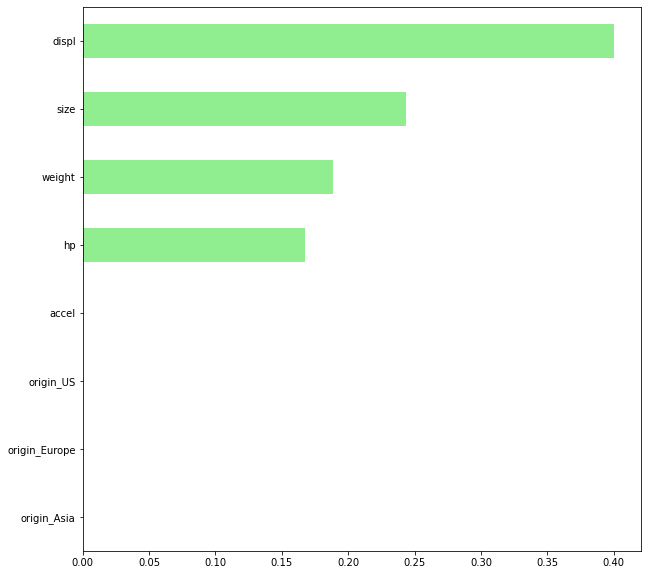

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(10, 10))
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

### Exercise: Train an RF regressor
In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [35]:
bikes = pd.read_csv('bikes.csv')
y = bikes['cnt']
X = bikes.drop('cnt', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [37]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

Great work! Next comes the test set RMSE evaluation part.

### Exercise: Evaluate the RF regressor
You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

In [38]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49


Great work! You can try training a single CART on the same dataset. The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!

### Exercise: Visualizing features importances
In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

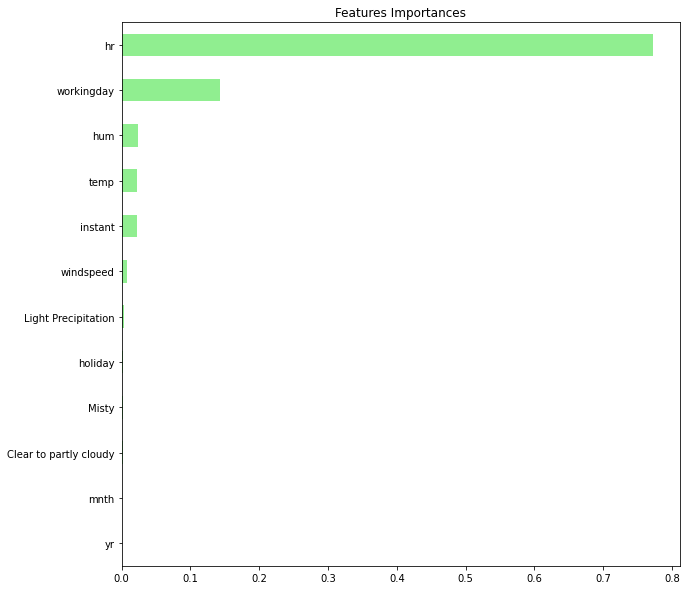

In [40]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 10))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!